In [10]:
import pandas as pd

df = pd.read_excel('Lab Session Data.xlsx', sheet_name='thyroid0387_UCI', na_values='?')

print(df.head())


   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured    TT4 T4U measured T4U FTI measured FTI TBG measured   TBG  \
0            f    NaN            f NaN            f NaN            f   NaN   
1            t

In [11]:
#5q)
#i)
# data types of each column
print(df.dtypes)

for column in df.columns:
    print(f"Column: {column}")
    print(f"Unique Values: {df[column].unique()}")
    print("\n")


Record ID                      int64
age                            int64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI                          float64
T

In [12]:
#5q)
#iii)

# Describe the numeric columns to understand their ranges
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(df[numeric_columns].describe())


          Record ID           age          TSH           T3          TT4  \
count  9.172000e+03   9172.000000  8330.000000  6568.000000  8730.000000   
mean   8.529473e+08     73.555822     5.218403     1.970629   108.700305   
std    7.581969e+06   1183.976718    24.184006     0.887579    37.522670   
min    8.408010e+08      1.000000     0.005000     0.050000     2.000000   
25%    8.504090e+08     37.000000     0.460000     1.500000    87.000000   
50%    8.510040e+08     55.000000     1.400000     1.900000   104.000000   
75%    8.607110e+08     68.000000     2.700000     2.300000   126.000000   
max    8.701190e+08  65526.000000   530.000000    18.000000   600.000000   

               T4U          FTI         TBG  
count  8363.000000  8370.000000  349.000000  
mean      0.976056   113.640746   29.870057  
std       0.200360    41.551650   21.080504  
min       0.170000     1.400000    0.100000  
25%       0.860000    93.000000   21.000000  
50%       0.960000   109.000000   26.00

In [13]:
#5q)
#iV)

# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)


Record ID                       0
age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2604
TT4 measured                    0
TT4                           442
T4U measured                    0
T4U                           809
FTI measured                    0
FTI                           802
TBG measured                    0
TBG                          8823
referral sourc

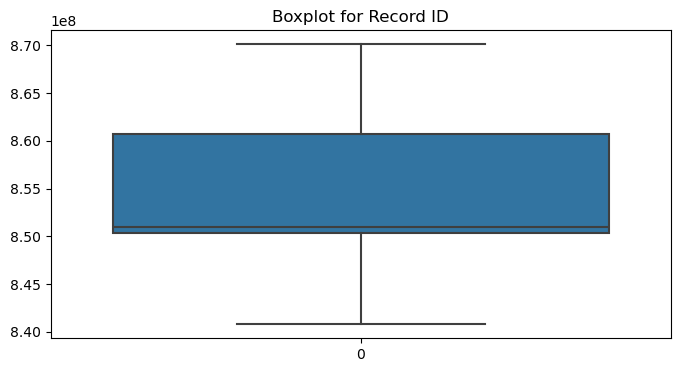

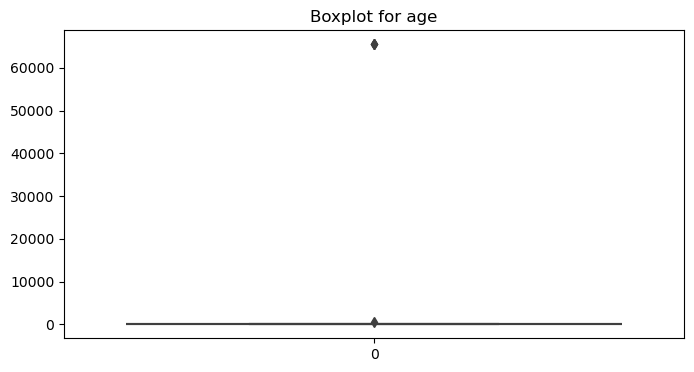

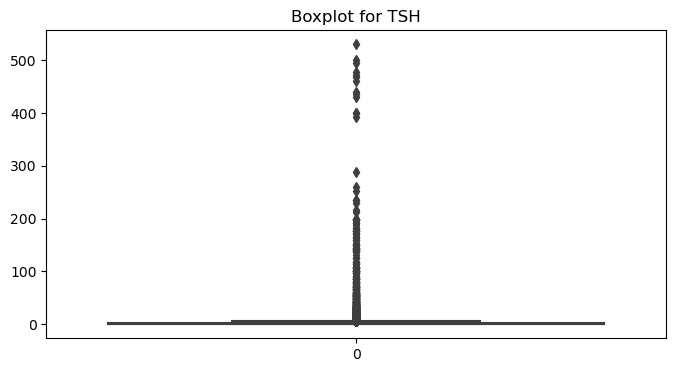

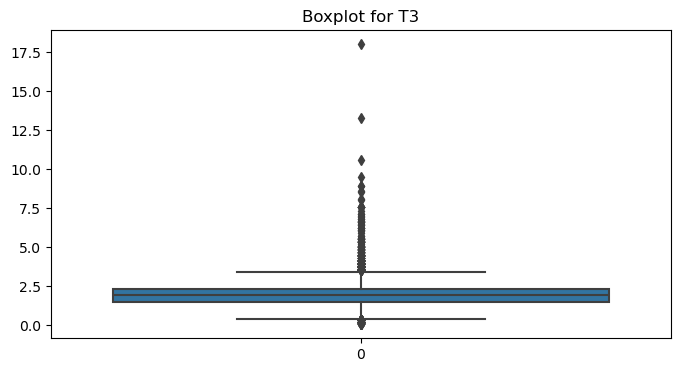

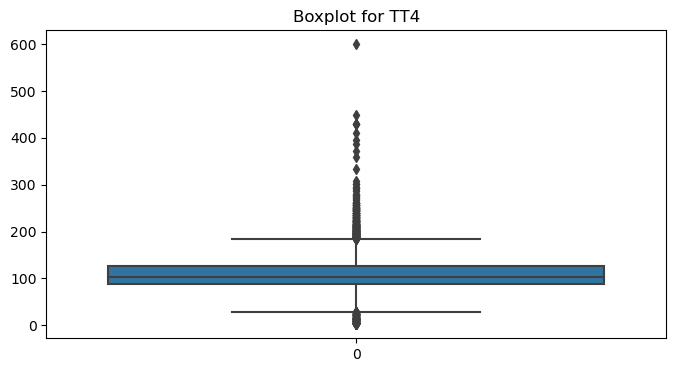

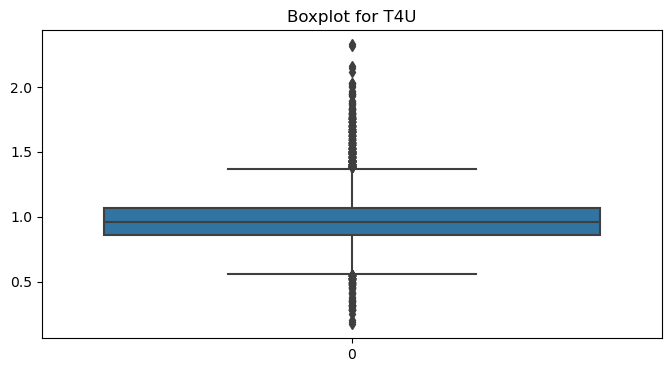

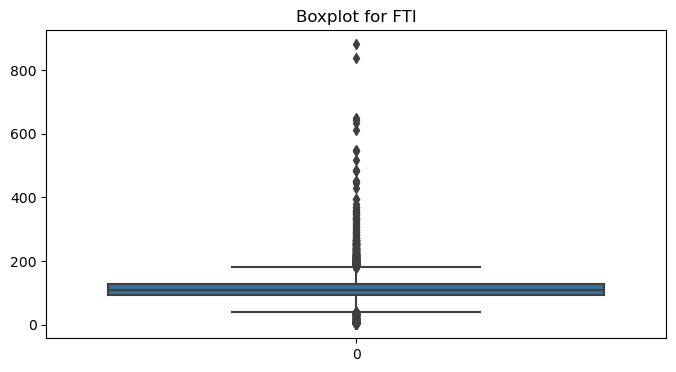

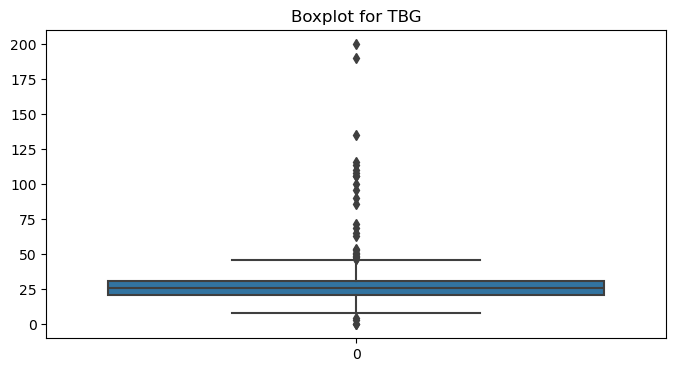

In [14]:
#5q
#v)
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers using boxplots for numeric columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[column])
    plt.title(f"Boxplot for {column}")
    plt.show()


In [15]:
#5q
#vi)
for column in numeric_columns:
    mean_val = df[column].mean()
    variance_val = df[column].var()
    std_dev_val = df[column].std()

    print(f"Column: {column}")
    print(f"Mean: {mean_val}")
    print(f"Variance: {variance_val}")
    print(f"Standard Deviation: {std_dev_val}")
    print("\n")


Column: Record ID
Mean: 852947346.6122983
Variance: 57486250586150.34
Standard Deviation: 7581968.780346589


Column: age
Mean: 73.55582206716092
Variance: 1401800.8688713463
Standard Deviation: 1183.9767180444667


Column: TSH
Mean: 5.218402753781513
Variance: 584.866153209295
Standard Deviation: 24.184006144749777


Column: T3
Mean: 1.970628805724726
Variance: 0.7877961683561565
Standard Deviation: 0.8875788237425206


Column: TT4
Mean: 108.70030469644902
Variance: 1407.950791475491
Standard Deviation: 37.52267036706598


Column: T4U
Mean: 0.9760557216309935
Variance: 0.04014430639006391
Standard Deviation: 0.2003604411805482


Column: FTI
Mean: 113.64074551935484
Variance: 1726.539585061158
Standard Deviation: 41.551649606979


Column: TBG
Mean: 29.87005729512894
Variance: 444.38764299946627
Standard Deviation: 21.080503860189545




In [19]:
#6)
df['Record ID'] = df['Record ID'].fillna(df['Record ID'].mean())

# Impute other numeric columns with median
for col in numeric_columns:
    if col == 'Record ID':
        print('hola')
        continue
    df[col] = df[col].fillna(df[col].median())

# Impute categorical columns with mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(categorical_columns)
    df[col] = df[col].fillna(df[col].mode()[0])

hola
Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured',
       'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
       'TBG measured', 'referral source', 'Condition'],
      dtype='object')
Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured',
       'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
       'TBG measured', 'referral source', 'Condition'],
      dtype='object')
Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment',

In [24]:
#Q5)
#ii)

for col in df.columns:
    print(df.describe())


from sklearn.preprocessing import OneHotEncoder

#nominal encoding
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply OneHotEncoder to the categorical columns
encoded_columns = enc.fit_transform(df[categorical_columns])

# Create a DataFrame with the encoded columns and automatically generated column names
encoded_df = pd.DataFrame(encoded_columns, columns=enc.get_feature_names_out(categorical_columns))

# Concatenate the encoded columns with the original dataframe (dropping the original categorical columns)
df_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

# Display the resulting DataFrame
print(df_encoded)

          Record ID           age          TSH           T3          TT4  \
count  9.172000e+03   9172.000000  9172.000000  9172.000000  9172.000000   
mean   8.529473e+08     73.555822     4.867869     1.950577   108.473796   
std    7.581969e+06   1183.976718    23.073462     0.751748    36.621135   
min    8.408010e+08      1.000000     0.005000     0.050000     2.000000   
25%    8.504090e+08     37.000000     0.590000     1.700000    88.000000   
50%    8.510040e+08     55.000000     1.400000     1.900000   104.000000   
75%    8.607110e+08     68.000000     2.500000     2.200000   124.000000   
max    8.701190e+08  65526.000000   530.000000    18.000000   600.000000   

               T4U          FTI          TBG  
count  9172.000000  9172.000000  9172.000000  
mean      0.974640   113.234959    26.147258  
std       0.191373    39.714898     4.172634  
min       0.170000     1.400000     0.100000  
25%       0.870000    95.000000    26.000000  
50%       0.960000   109.000000  

In [25]:
df_encoded

,Record ID,age,TSH,T3,TT4,T4U,FTI,TBG,sex_F,sex_M,...,Condition_MI,Condition_MK,Condition_N,Condition_NO CONDITION,Condition_O,Condition_OI,Condition_P,Condition_Q,Condition_R,Condition_S
0,840801013,29,0.3,1.9,104.0,0.96,109.0,26.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,840801014,29,1.6,1.9,128.0,0.96,109.0,26.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,840801042,41,1.4,1.9,104.0,0.96,109.0,11.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,840803046,36,1.4,1.9,104.0,0.96,109.0,26.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,840803047,32,1.4,1.9,104.0,0.96,109.0,36.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,870119022,56,1.4,1.9,64.0,0.83,77.0,26.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9168,870119023,22,1.4,1.9,91.0,0.92,99.0,26.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9169,870119025,69,1.4,1.9,113.0,1.27,89.0,26.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9170,870119027,47,1.4,1.9,75.0,0.85,88.0,26.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply Z-score scaling
# Assuming you want to scale all numeric columns
scaled_df = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

In [29]:
scaled_df

,Record ID,age,TSH,T3,TT4,T4U,FTI,TBG,sex_F,sex_M,...,Condition_MI,Condition_MK,Condition_N,Condition_NO CONDITION,Condition_O,Condition_OI,Condition_P,Condition_Q,Condition_R,Condition_S
0,-1.602090,-0.037634,-0.197981,-0.067283,-0.122171,-0.076501,-0.106640,-0.035293,0.661527,-0.661527,...,-0.014768,-0.041803,-0.110175,0.595483,-0.039099,-0.010442,-0.023355,-0.039099,-0.14777,-0.096716
1,-1.602090,-0.037634,-0.141637,-0.067283,0.533224,-0.076501,-0.106640,-0.035293,0.661527,-0.661527,...,-0.014768,-0.041803,-0.110175,0.595483,-0.039099,-0.010442,-0.023355,-0.039099,-0.14777,-0.096716
2,-1.602086,-0.027499,-0.150305,-0.067283,-0.122171,-0.076501,-0.106640,-3.630341,0.661527,-0.661527,...,-0.014768,-0.041803,-0.110175,0.595483,-0.039099,-0.010442,-0.023355,-0.039099,-0.14777,-0.096716
3,-1.601822,-0.031722,-0.150305,-0.067283,-0.122171,-0.076501,-0.106640,-0.035293,0.661527,-0.661527,...,-0.014768,-0.041803,-0.110175,0.595483,-0.039099,-0.010442,-0.023355,-0.039099,-0.14777,-0.096716
4,-1.601822,-0.035100,-0.150305,-0.067283,-0.122171,-0.076501,-0.106640,2.361405,0.661527,-0.661527,...,-0.014768,-0.041803,-0.110175,-1.679308,-0.039099,-0.010442,-0.023355,-0.039099,-0.14777,10.339530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,2.264928,-0.014829,-0.150305,-0.067283,-1.214496,-0.755839,-0.912427,-0.035293,-1.511655,1.511655,...,-0.014768,-0.041803,-0.110175,0.595483,-0.039099,-0.010442,-0.023355,-0.039099,-0.14777,-0.096716
9168,2.264928,-0.043547,-0.150305,-0.067283,-0.477177,-0.285528,-0.358448,-0.035293,-1.511655,1.511655,...,-0.014768,-0.041803,-0.110175,0.595483,-0.039099,-0.010442,-0.023355,-0.039099,-0.14777,-0.096716
9169,2.264928,-0.003848,-0.150305,-0.067283,0.123602,1.543456,-0.610257,-0.035293,-1.511655,1.511655,...,-0.014768,-0.041803,-0.110175,-1.679308,-0.039099,-0.010442,-0.023355,-0.039099,-0.14777,-0.096716
9170,2.264928,-0.022431,-0.150305,-0.067283,-0.914107,-0.651325,-0.635437,-0.035293,0.661527,-0.661527,...,-0.014768,-0.041803,-0.110175,0.595483,-0.039099,-0.010442,-0.023355,-0.039099,-0.14777,-0.096716


In [30]:
scaled_df.columns

Index(['Record ID', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'sex_F',
       'sex_M', 'on thyroxine_f', 'on thyroxine_t', 'query on thyroxine_f',
       'query on thyroxine_t', 'on antithyroid medication_f',
       'on antithyroid medication_t', 'sick_f', 'sick_t', 'pregnant_f',
       'pregnant_t', 'thyroid surgery_f', 'thyroid surgery_t',
       'I131 treatment_f', 'I131 treatment_t', 'query hypothyroid_f',
       'query hypothyroid_t', 'query hyperthyroid_f', 'query hyperthyroid_t',
       'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t', 'tumor_f', 'tumor_t',
       'hypopituitary_f', 'hypopituitary_t', 'psych_f', 'psych_t',
       'TSH measured_f', 'TSH measured_t', 'T3 measured_f', 'T3 measured_t',
       'TT4 measured_f', 'TT4 measured_t', 'T4U measured_f', 'T4U measured_t',
       'FTI measured_f', 'FTI measured_t', 'TBG measured_f', 'TBG measured_t',
       'referral source_STMW', 'referral source_SVHC', 'referral source_SVHD',
       'referral source_SVI', 'referral so